In [ ]:
# Install Kaggle package
!pip install -q kaggle

# Make a directory for the Kaggle API credentials
!mkdir -p ~/.kaggle

# Move the kaggle.json file into the directory
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 47% 12.0M/25.7M [00:00<00:00, 125MB/s]
100% 25.7M/25.7M [00:00<00:00, 171MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Check the first few rows of the dataset
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Set of stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Importing libraries
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [ ]:
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

# Apply the preprocessing to the text column
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
# Display the first few rows after preprocessing
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000,), (40000,), (10000,), (10000,))

In [ ]:
#Tokenization and Vectorization:

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the training and test sets
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Display the shape of the transformed dataset
X_train_tfidf.shape, X_test_tfidf.shape


((40000, 5000), (10000, 5000))

In [ ]:
# Encoding Labels: The target labels (positive and negative) need to be encoded as numerical values (e.g., 1 for positive, 0 for negative).
# python

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Encode the labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [ ]:
# Modeling Using ANN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

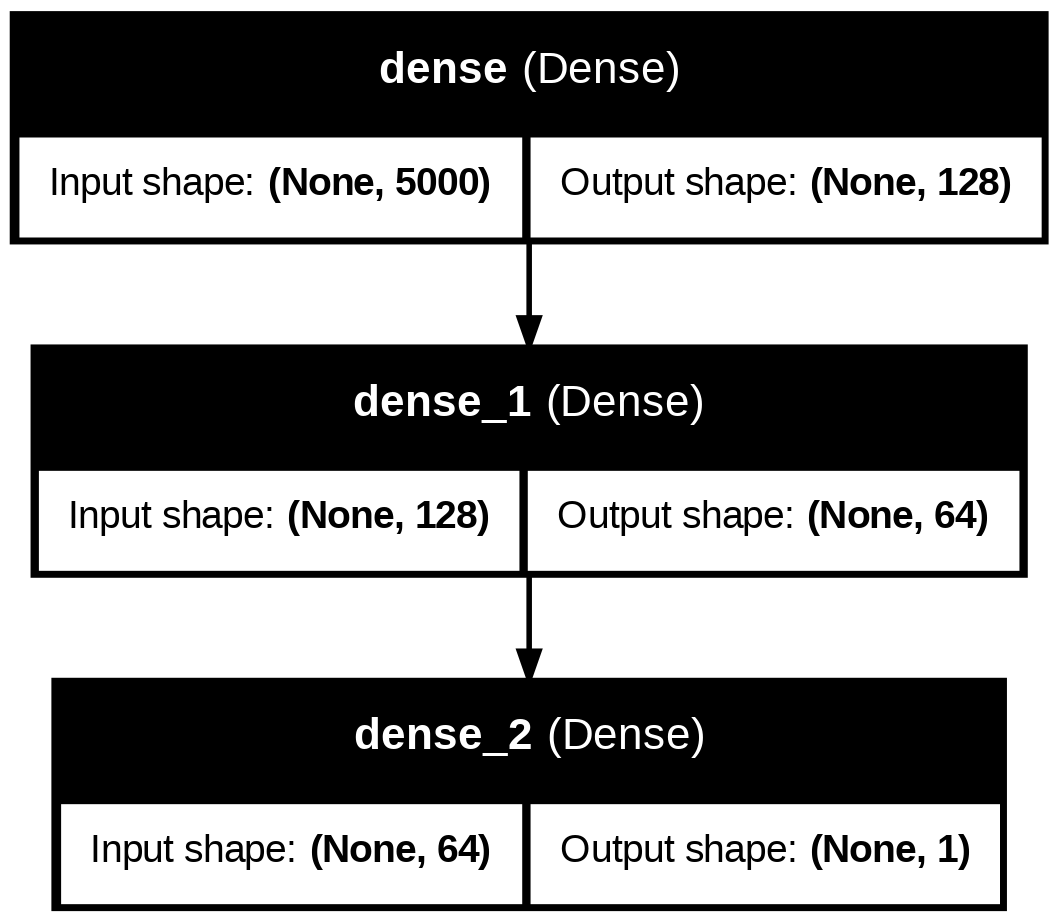

In [ ]:
# plot model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_data=(X_test_tfidf, y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8323 - loss: 0.3767 - val_accuracy: 0.8869 - val_loss: 0.2676
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9078 - loss: 0.2244 - val_accuracy: 0.8783 - val_loss: 0.2803
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9402 - loss: 0.1517 - val_accuracy: 0.8790 - val_loss: 0.3419
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9807 - loss: 0.0588 - val_accuracy: 0.8738 - val_loss: 0.4580
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9971 - loss: 0.0126 - val_accuracy: 0.8747 - val_loss: 0.6940


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_tfidf, y_test, verbose=2)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.6940
Test Accuracy: 87.47%


In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Print some results
for i in range(5):
    print(f'Review: {X_test.iloc[i]}')
    print(f'True Sentiment: {le.inverse_transform([y_test[i]])[0]}, Predicted Sentiment: {le.inverse_transform([y_pred[i][0]])[0]}')
    print('-'*50)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Review: really liked summerslam due look arena curtains look overall interesting reason anyways could one best summerslams ever wwf didnt lex luger main event yokozuna time ok huge fat man vs strong man im glad times changed terrible main event like every match luger terrible matches card razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening event shawn named big monster body guard diesel irs vs kid bret hart first takes doink takes jerry lawler stuff harts lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves
True Sentiment: positive, Predicted Sentiment: negative
--------------------------------------------------
Review: many television shows appeal quite many different kinds fans like farscape doesi k

# **Limitations of Traditional Neural Networks for Sequential Data**

**Independence Assumption:**

**Issue**: Traditional neural networks (like feedforward networks) treat each input as an independent observation. They do not account for the temporal dependencies that exist in sequential data.

**Impact**: In time series data, the current observation is often influenced by past observations, which traditional ANNs cannot capture, leading to a loss of valuable information.

**Lack of Temporal Memory**:

**Issue**: Standard neural networks lack mechanisms to remember previous inputs. They cannot store or utilize historical context, which is crucial for understanding patterns over time.

**Impact**: Without memory, the model cannot learn long-term dependencies, making it ineffective for tasks where context from earlier inputs is essential (e.g., predicting future stock prices based on historical trends).

**Fixed Input Size:**

**Issue**: Traditional neural networks require a fixed-size input. They cannot easily handle variable-length sequences, which are common in time series or natural language processing tasks.

**Impact**: This inflexibility can lead to the need for preprocessing steps (like padding) that can distort the natural relationships in the data.

**Conclusion**

For tasks involving sequential data, models designed to handle these characteristics, such as **Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), or Gated Recurrent Units (GRUs)**, are preferred. These architectures are specifically designed to retain memory of past inputs, capture dependencies over time, and effectively model the sequential nature of the data.

# **What is RNN?**

**Temporal Dependency Learning**: RNNs use **recurrent connections** to maintain internal memory, allowing them to capture and utilize information from previous time steps.

**Variable-Length Input Handling**: RNNs can process inputs of varying lengths, making them ideal for tasks like natural language processing and time series analysis.

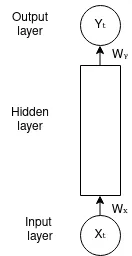

**Forward Neural Network**

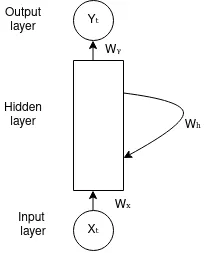

**Recurrent Neural Network**

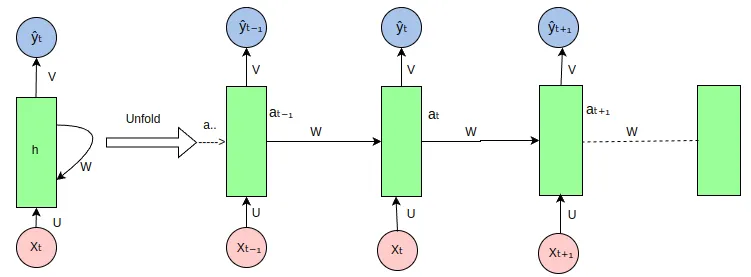

**Sequential Input Processing**: The RNN scans the input vector
𝑋 sequentially from left to right, updating the hidden state and generating an output vector
𝑦 at each time step.

**Shared Parameters**: The RNN uses the same weight parameters
𝑈
,
𝑊
, and
𝑉 across all time steps, where:

𝑈: Weights from the input layer
𝑋 to the hidden layer
ℎ.

𝑊: Weights between hidden layers.

𝑉: Weights from the hidden layer
ℎ to the output layer
𝑦.

**Efficiency in Capturing Dependencies**: Sharing parameters allows the RNN to efficiently capture temporal dependencies and retain information from previous inputs in its current hidden state.

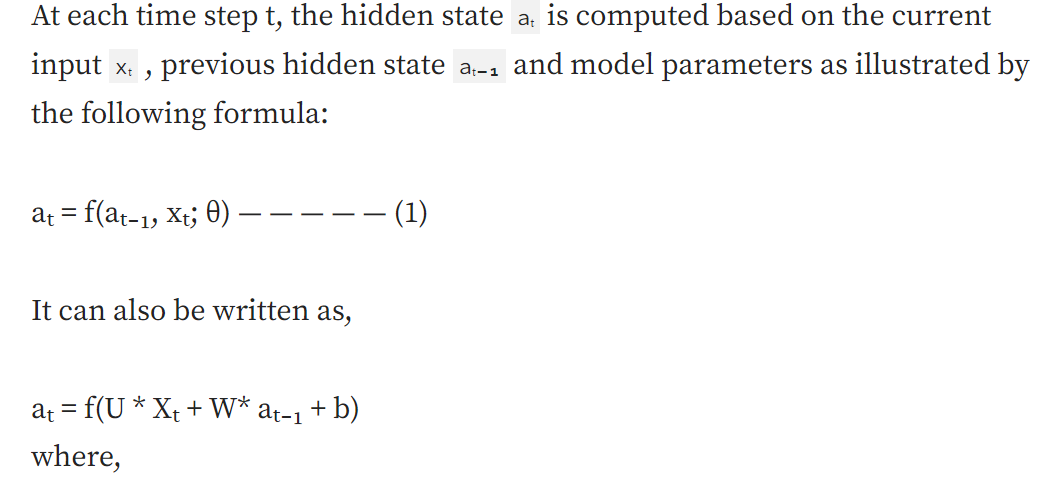

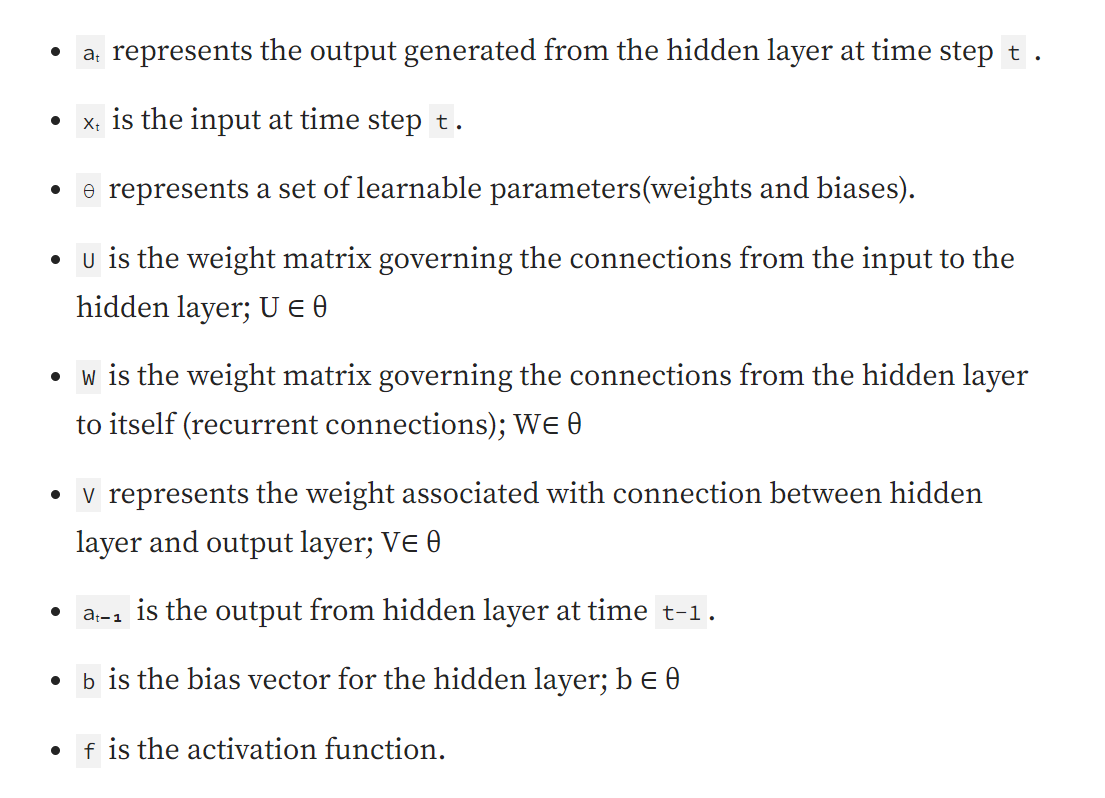

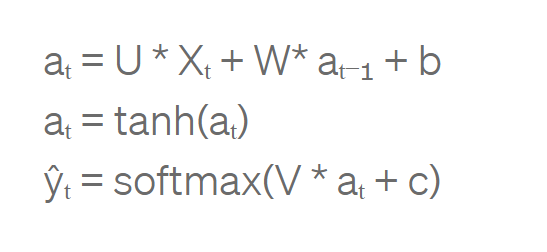

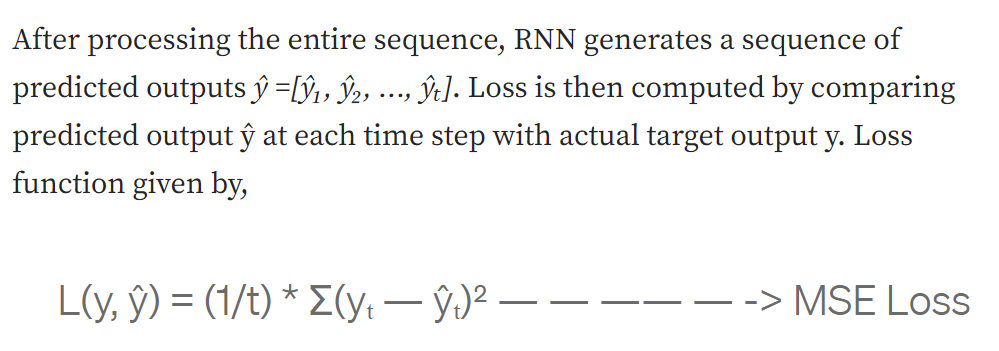

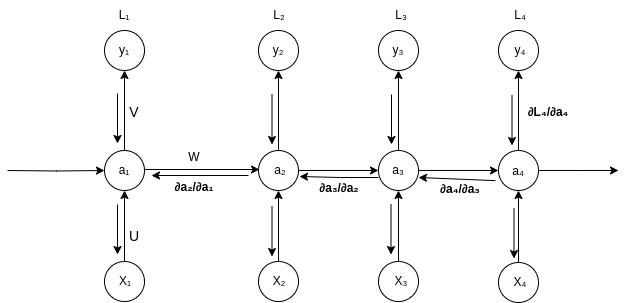

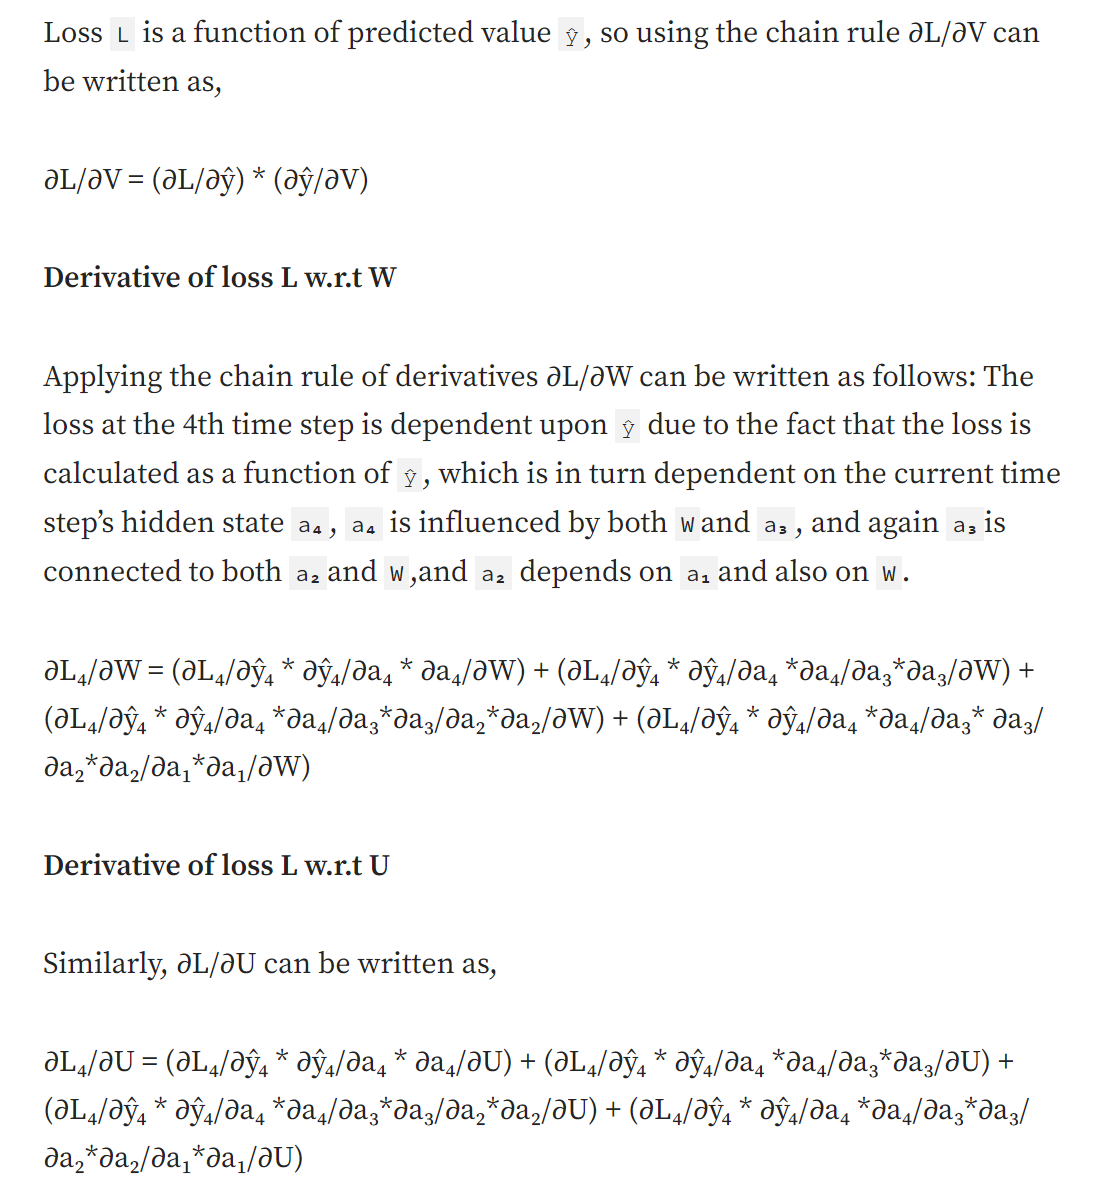

**RNN Limitation:**

RNNs face the vanishing gradient problem, where gradients become too small, hindering the capture of long-term dependencies and slowing convergence, and the exploding gradient problem, where large gradients cause numerical instability, making it difficult for the model to converge to an optimal solution.


[LSTM in details](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)







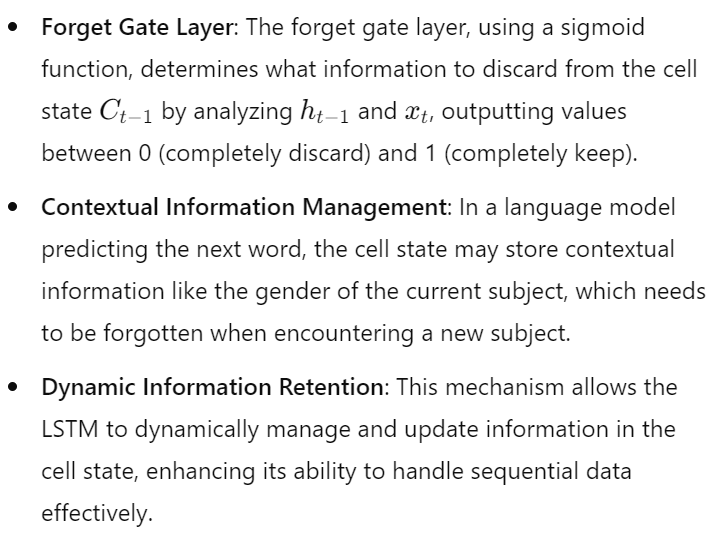

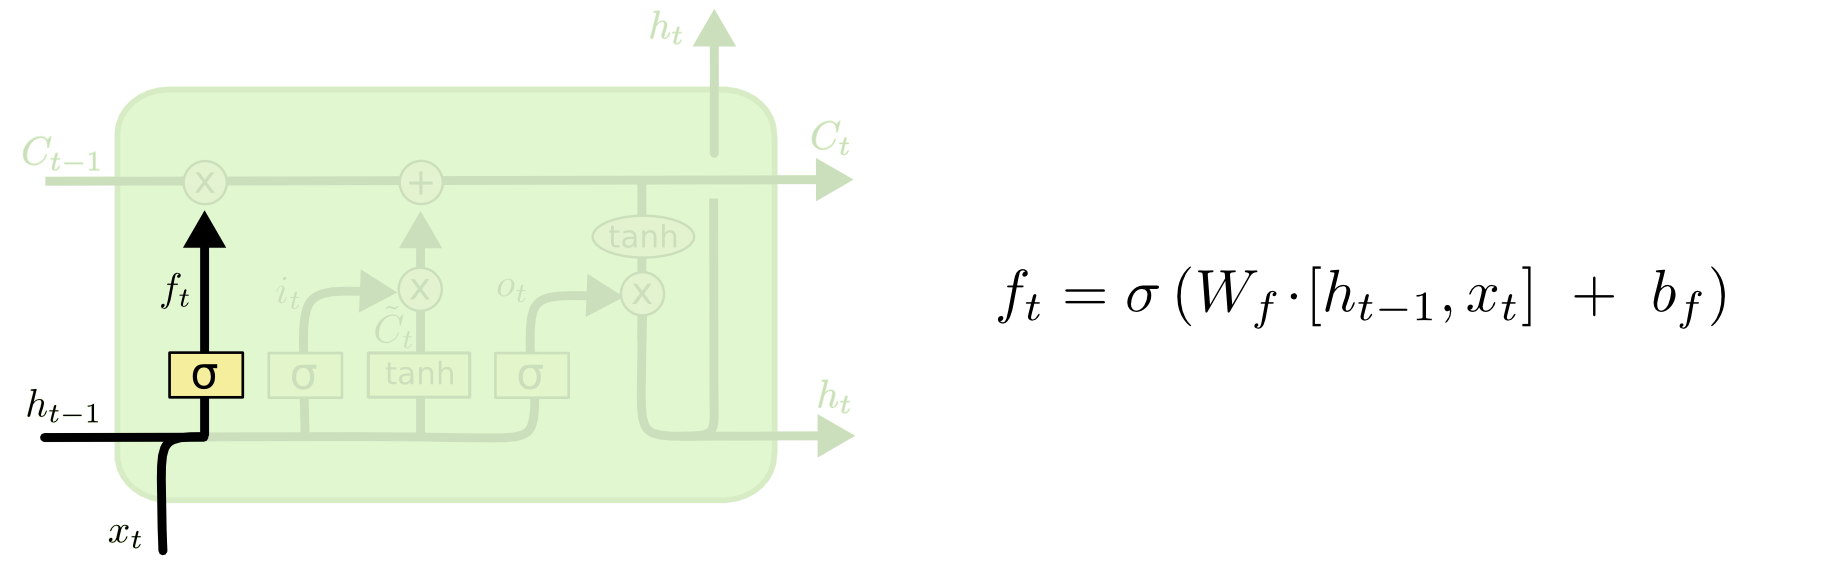

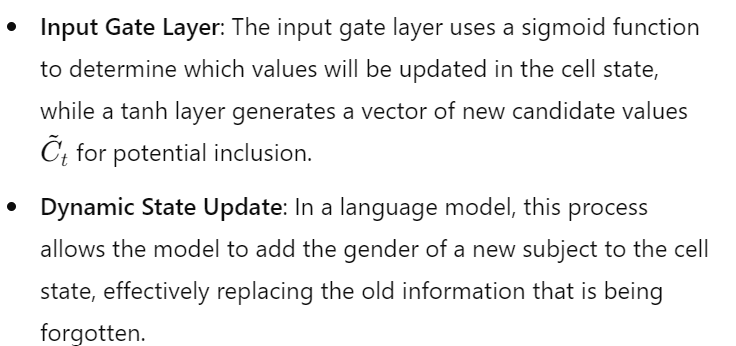

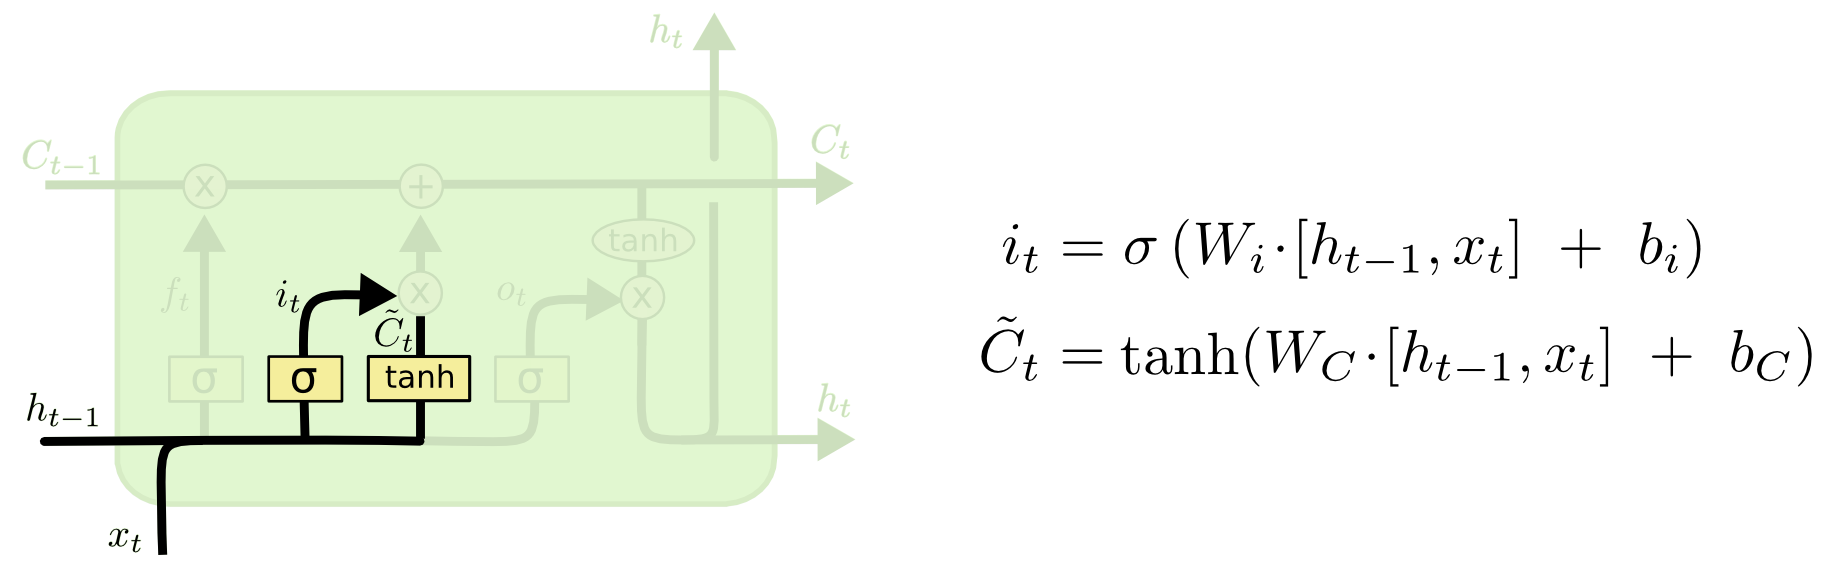

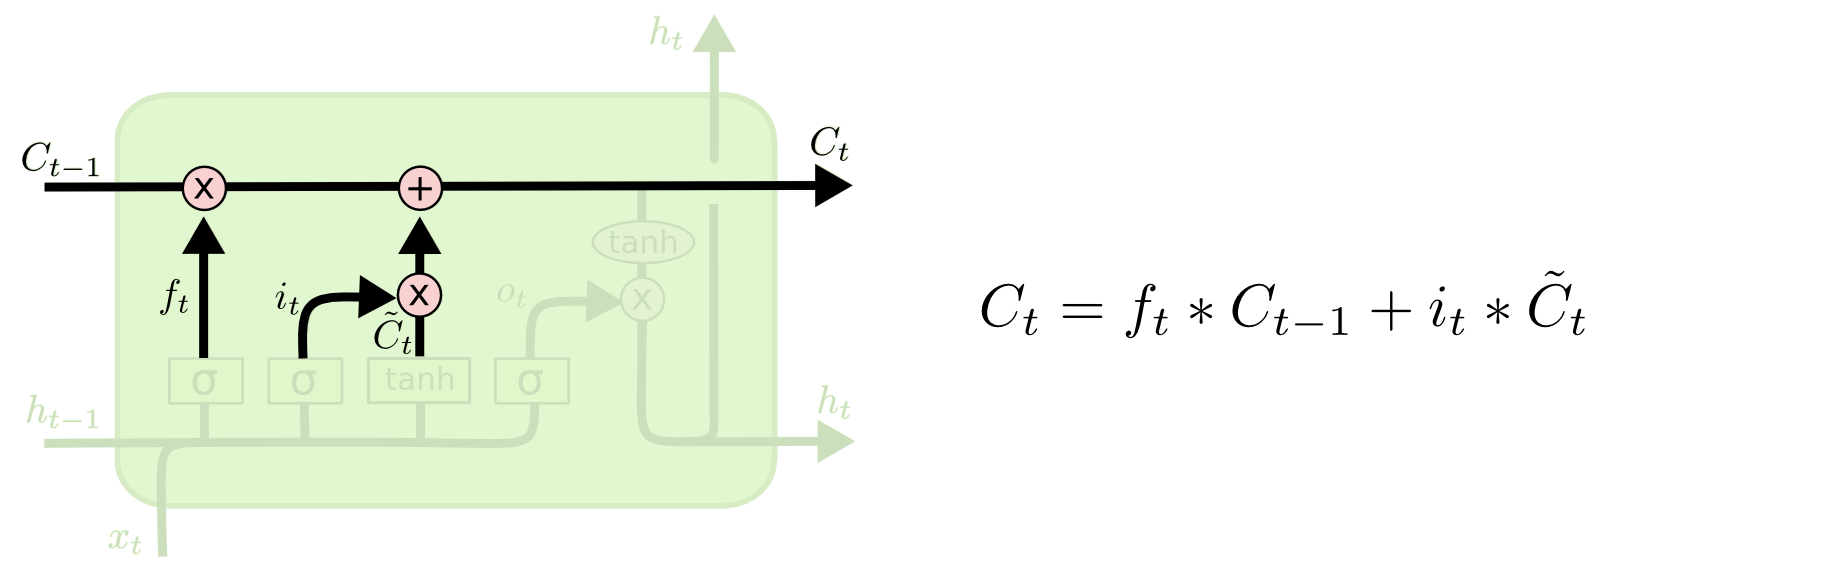

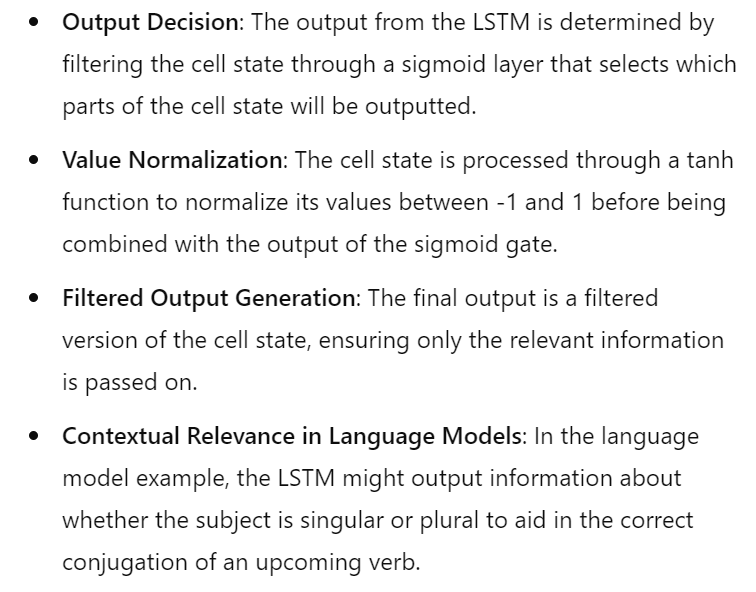

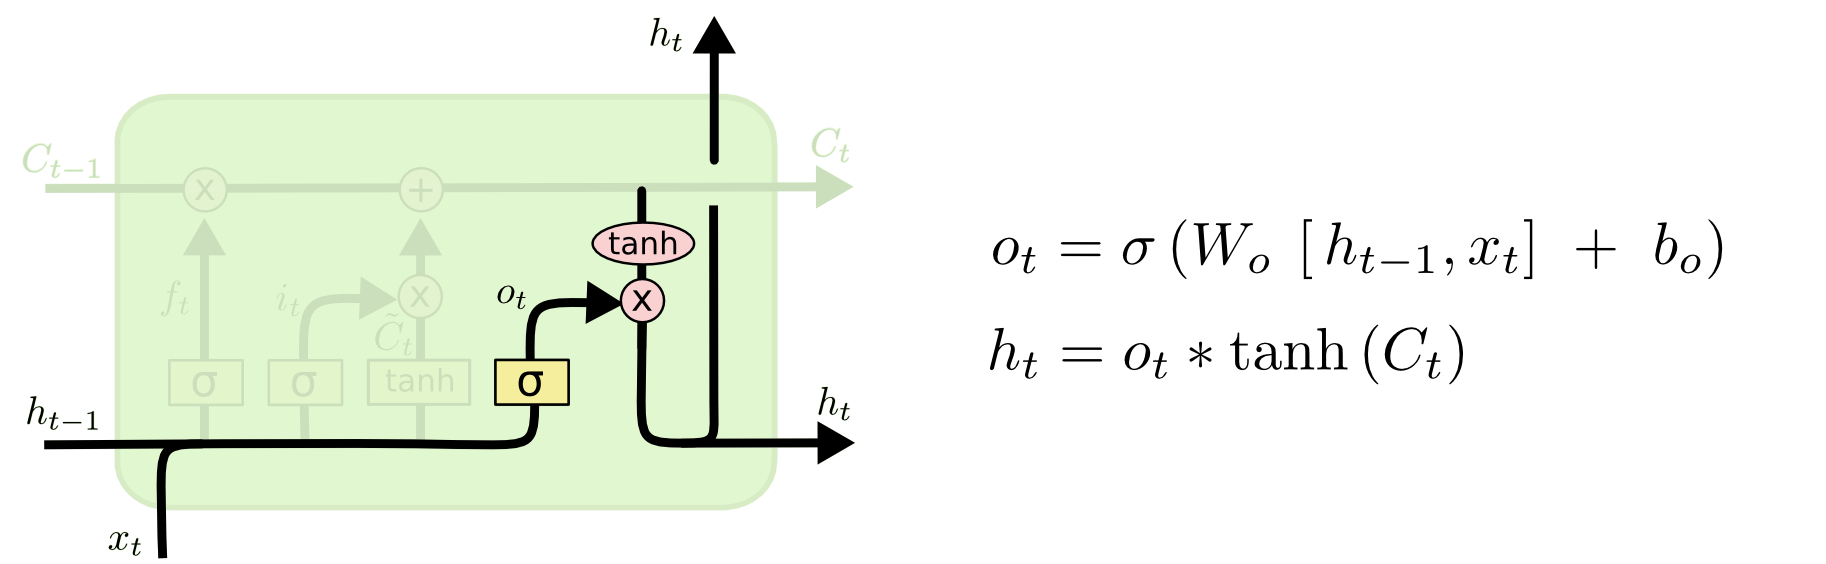

# **LSTM Implementation**

In [ ]:
# Load the dataset into a Pandas DataFrame
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [ ]:
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(40000,)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)


In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
len(X_train_seq)

40000

In [ ]:
max_length = max(len(x) for x in X_train_seq)  # Determine the maximum length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout



In [ ]:
model = Sequential()
model.add(Input(shape = (max_length,)))
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 923, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 923, 100)            │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 923, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 812,101 (3.10 MB)

 Trainable params: 812,101 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.7832 - loss: 0.4458 - val_accuracy: 0.8837 - val_loss: 0.2765
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.8941 - loss: 0.2693 - val_accuracy: 0.8462 - val_loss: 0.3331
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9092 - loss: 0.2384 - val_accuracy: 0.8847 - val_loss: 0.2821
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9315 - loss: 0.1852 - val_accuracy: 0.8803 - val_loss: 0.2947
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9439 - loss: 0.1570 - val_accuracy: 0.8666 - val_loss: 0.3528


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=2)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 - 7s - 21ms/step - accuracy: 0.8666 - loss: 0.3528
Test Accuracy: 86.66%


In [ ]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

for i in range(5):
    print(f'Review: {X_test.iloc[i]}')
    print(f'True Sentiment: {le.inverse_transform([y_test[i]])[0]}, Predicted Sentiment: {le.inverse_transform([y_pred[i][0]])[0]}')
    print('-' * 50)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Review: really liked summerslam due look arena curtains look overall interesting reason anyways could one best summerslams ever wwf didnt lex luger main event yokozuna time ok huge fat man vs strong man im glad times changed terrible main event like every match luger terrible matches card razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening event shawn named big monster body guard diesel irs vs kid bret hart first takes doink takes jerry lawler stuff harts lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves
True Sentiment: positive, Predicted Sentiment: negative
--------------------------------------------------
Review: many television shows appeal quite many different kinds fans like farscape doesi 